# Installation

In [1]:
!pip install pandas
!pip install opencv-python==4.6.0.66
!pip install seaborn
!pip install scikit-learn

# Import

In [2]:
import numpy as np
import pandas as pd 


import os
for dirname, _, filenames in os.walk('C:/Users/Admin/Downloads/Thesis Code/AutismDataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import random
import os

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models, Sequential
from tensorflow.keras import optimizers

from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, SeparableConv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.applications.vgg16 import VGG16

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0001.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0002.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0003.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0004.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0005.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0006.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0007.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0008.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0009.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0010.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0011.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0012.jpg
C:/Users/Admin/D

C:/Users/Admin/Downloads/Thesis Code/AutismDataset\train\Autistic.0.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\train\Autistic.1.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\train\Autistic.10.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\train\Autistic.100.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\train\Autistic.1000.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\train\Autistic.1001.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\train\Autistic.1002.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\train\Autistic.1003.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\train\Autistic.1004.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\train\Autistic.1005.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\train\Autistic.1006.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\train\Autistic.1007.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\train\Autistic.1008.jpg
C:/Users/Admin/Downloads/Thesis Co

# Train & Test Directories 

In [3]:
train_data = "C:/Users/Admin/Downloads/Thesis Code/AutismDataset/train"
test_data = "C:/Users/Admin/Downloads/Thesis Code/AutismDataset/test"

# Splitting Autistic & Non-Autistic

In [4]:
train_non_autistic = []
train_autistic = []

for i in os.listdir(train_data):
    if 'Non_Autistic' in i:
        train_non_autistic.append(os.path.join(train_data, i))
    else:
        train_autistic.append(os.path.join(train_data, i))

test_non_autistic = []
test_autistic = []

for i in os.listdir(test_data):
    if 'Non_Autistic' in i:
        test_non_autistic.append(os.path.join(test_data, i))
    else:
        test_autistic.append(os.path.join(test_data, i))

In [5]:
train_imgs = train_autistic + train_non_autistic
random.shuffle(train_imgs)

In [6]:
test_imgs = test_autistic + test_non_autistic
random.shuffle(test_imgs)

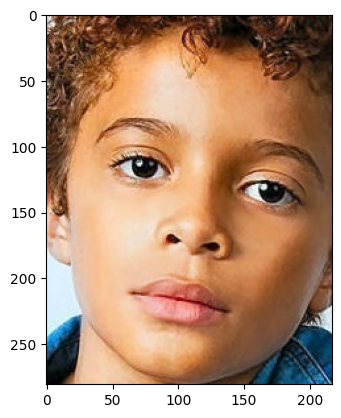

In [7]:
import matplotlib.image as mpimg
for ima in train_imgs[0:1]:
    img=mpimg.imread(ima)
    imgplot = plt.imshow(img)
    plt.show()

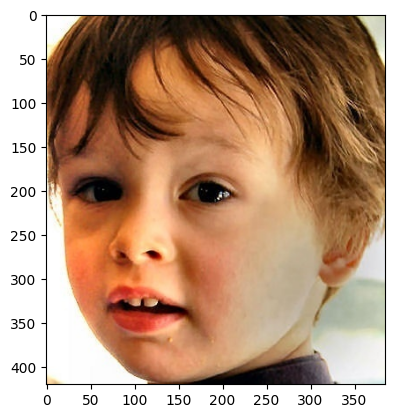

In [8]:
import matplotlib.image as mpimg
for ima in test_imgs[0:1]:
    img=mpimg.imread(ima)
    imgplot = plt.imshow(img)
    plt.show()

# Resizing The Images

In [9]:
def read_and_process_image(list_of_images):
    X = []
    y = []
    
    for image in list_of_images:
        X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (224, 224), interpolation = cv2.INTER_CUBIC))
        if 'Non_Autistic' in image:
            y.append(0)
        else:
            y.append(1)
            
    return X,y

X_train, y_train = read_and_process_image(train_imgs)
X_test, y_test = read_and_process_image(test_imgs)


# Validation Data

In [10]:
val_autistic = "/Users/Admin/Downloads/Thesis Code/AutismDataset/valid/Autistic"
val_non_autistic = "/Users/Admin/Downloads/Thesis Code/AutismDataset/valid/Non_Autistic"
val_autistic_imgs = ["/Users/Admin/Downloads/Thesis Code/AutismDataset/valid/Autistic/{}".format(i) for i in os.listdir(val_autistic)]
val_non_autistic_imgs = ["/Users/Admin/Downloads/Thesis Code/AutismDataset/valid/Non_Autistic/{}".format(i) for i in os.listdir(val_non_autistic)]
val_imgs = val_autistic_imgs + val_non_autistic_imgs
random.shuffle(val_imgs)

In [11]:
X_val, y_val = read_and_process_image(val_imgs)

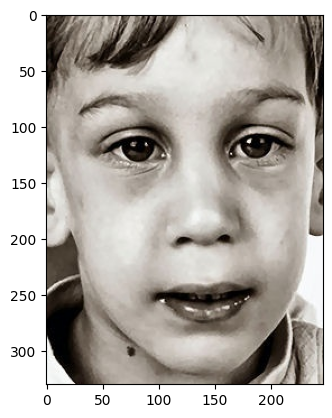

In [12]:
import matplotlib.image as mpimg
for ima in val_imgs[0:1]:
    img=mpimg.imread(ima)
    imgplot = plt.imshow(img)
    plt.show()

# Shape Of Data

In [13]:
# print("Shape of Train images:", X_train.shape)
# print("Shape of Train labels:", y_train.shape)
# print("Shape of validation images:", X_val.shape)
# print("Shape of validation labels:", y_val.shape)

# Preprocessing 

In [14]:
# # Define a function for image preprocessing
# def preprocess_image(train_data, target_size=(224, 224), grayscale=False):
#     image = cv2.imread(train_data, cv2.IMREAD_COLOR)
    
#     if grayscale:
#         image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
#     if target_size:
#         image = cv2.resize(image, target_size, interpolation=cv2.INTER_CUBIC)
    
#     #Normalize pixel values
#     image = image / 255.0
    
#     return image

# # Preprocess training and validation data
# X_train = [preprocess_image(train_data) for train_data in train_imgs]
# X_test = [preprocess_image(test_data) for test_data in test_imgs]
# X_val = [preprocess_image(val_data) for val_data in val_imgs]



In [ ]:
import cv2

# Define a function for image preprocessing
def preprocess_image(train_data, target_size=(224, 224), grayscale=False, apply_noise_reduction=True, apply_histogram_equalization=True):
    # Read the image
    image = cv2.imread(train_data, cv2.IMREAD_COLOR)
    
    # Convert to grayscale if specified
    if grayscale:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply histogram equalization (only for grayscale images)
    if apply_histogram_equalization and image.ndim == 2:  # Check if the image is grayscale
        image = cv2.equalizeHist(image)
    
    # Resize the image
    if target_size:
        image = cv2.resize(image, target_size, interpolation=cv2.INTER_CUBIC)
    
    # Apply noise reduction (Gaussian blur)
    if apply_noise_reduction:
        image = cv2.GaussianBlur(image, (5, 5), 0)
    
    # Normalize pixel values
    image = image / 255.0
    
    return image

X_train_he_nr = [preprocess_image(train_data, apply_histogram_equalization=True, apply_noise_reduction=True) for train_data in train_imgs]
X_test_he_nr = [preprocess_image(test_data, apply_histogram_equalization=True, apply_noise_reduction=True) for test_data in test_imgs]
X_val_he_nr = [preprocess_image(val_data, apply_histogram_equalization=True, apply_noise_reduction=True) for val_data in val_imgs]

# # Preprocess training and validation data without histogram equalization and with noise reduction
# X_train_nr = [preprocess_image(train_data, apply_histogram_equalization=False, apply_noise_reduction=True) for train_data in train_imgs]
# X_test_nr = [preprocess_image(test_data, apply_histogram_equalization=False, apply_noise_reduction=True) for test_data in test_imgs]
# X_val_nr = [preprocess_image(val_data, apply_histogram_equalization=False, apply_noise_reduction=True) for val_data in val_imgs]

# # Preprocess training and validation data without histogram equalization and without noise reduction
# X_train_original = [preprocess_image(train_data, apply_histogram_equalization=False, apply_noise_reduction=False) for train_data in train_imgs]
# X_test_original = [preprocess_image(test_data, apply_histogram_equalization=False, apply_noise_reduction=False) for test_data in test_imgs]
# X_val_original = [preprocess_image(val_data, apply_histogram_equalization=False, apply_noise_reduction=False) for val_data in val_imgs]

# Converting Train & Val Data To np Array


In [15]:
# X_val = np.array(X_val)
# y_val = np.array(y_val)
# X_train = np.array(X_train)
# y_train = np.array(y_train)
# X_test = np.array(X_test)
# y_test = np.array(y_test)

In [ ]:
X_val = np.array(X_val_he_nr)
y_val = np.array(y_val)
X_train = np.array(X_train_he_nr)
y_train = np.array(y_train)
X_test = np.array(X_test_he_nr)
y_test = np.array(y_test)

# Data Augmentation

In [16]:
# Generating Larger DataSet
## Data Augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=4,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
val_generator = val_datagen.flow(X_val, y_val, batch_size=32)
test_generator = test_datagen.flow(X_test, y_test, batch_size=32)


# Feature Extraction (vgg16,vgg19,mobilenet,xception,efficentnet)

In [17]:
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.applications import Xception, VGG19, MobileNet, VGG16, EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
from sklearn.feature_selection import SelectKBest

# Assuming you have X_train, X_val, y_train_encoded, and y_val_encoded from your previous code

# Define a function for feature extraction using a pre-trained model
def extract_features(model, X_data):
    base_model = model(weights='imagenet', include_top=False)
    model = Model(inputs=base_model.input, outputs=GlobalAveragePooling2D()(base_model.output))

    features = []
    for img in X_data:
        img = np.expand_dims(img, axis=0)
        features.append(model.predict(img))

    return np.vstack(features)

# Define the models
models = [Xception, VGG19, MobileNet, VGG16, EfficientNetB0]

# Initialize lists to store extracted features
X_train_features = []
X_val_features = []
X_test_features = []

# Extract features using each model
for model in models:
    X_train_features.append(extract_features(model, X_train))
    X_val_features.append(extract_features(model, X_val))
    X_test_features.append(extract_features(model, X_test))

# Convert lists to numpy arrays
X_train_features = np.concatenate(X_train_features, axis=1)
X_val_features = np.concatenate(X_val_features, axis=1)
X_test_features = np.concatenate(X_test_features, axis=1)

# Standardize the features
scaler = StandardScaler()
X_train_features_std = scaler.fit_transform(X_train_features)
X_val_features_std = scaler.transform(X_val_features)
X_test_features_std = scaler.transform(X_test_features)




1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 55ms/step


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 55ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 55ms/step


1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 61ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 84ms/step


1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 59ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 56ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 56ms/step


1/1 [==============================] - 0s 50ms/step


# ANOVA Analysis

In [18]:
# Perform ANOVA analysis
k_best = SelectKBest(f_classif, k='all')

X_train_selected = k_best.fit_transform(X_train_features_std, y_train)
X_test_selected = k_best.transform(X_test_features_std)
X_val_selected = k_best.transform(X_val_features_std)

# Print selected features
selected_features_indices = np.where(k_best.get_support())[0]
print("Selected Features Indices:", selected_features_indices)


Selected Features Indices: [   0    1    2 ... 5373 5374 5375]


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the DNN model
def build_dnn_model(input_dim, num_classes):
    model = Sequential([
        Dense(256, activation='relu', input_dim=input_dim),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Check the number of features after ANOVA feature selection
num_selected_features = len(selected_features_indices)

# Build the DNN model
dnn_model = build_dnn_model(num_selected_features, 2)




In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint('model_checkpoint.h5', 
                             monitor='val_accuracy', 
                             save_best_only=True, 
                             mode='max', 
                             verbose=1)

In [ ]:
# Train the DNN model
history = dnn_model.fit(X_train_selected, y_train,
                        epochs=100,
                        batch_size=32,
                        validation_data=(X_val_selected, y_val),callbacks=[checkpoint])


Epoch 1/100
76/80 [===========================>..] - ETA: 0s - loss: 0.8821 - accuracy: 0.7229
Epoch 1: val_accuracy improved from -inf to 0.77000, saving model to model_checkpoint.h5
80/80 [==============================] - 2s 17ms/step - loss: 0.8779 - accuracy: 0.7240 - val_loss: 0.5869 - val_accuracy: 0.7700
Epoch 2/100
79/80 [============================>.] - ETA: 0s - loss: 0.5801 - accuracy: 0.7935
Epoch 2: val_accuracy did not improve from 0.77000
80/80 [==============================] - 1s 11ms/step - loss: 0.5811 - accuracy: 0.7925 - val_loss: 0.4803 - val_accuracy: 0.7500
Epoch 3/100
77/80 [===========================>..] - ETA: 0s - loss: 0.4138 - accuracy: 0.8332
Epoch 3: val_accuracy improved from 0.77000 to 0.78000, saving model to model_checkpoint.h5
80/80 [==============================] - 1s 11ms/step - loss: 0.4201 - accuracy: 0.8299 - val_loss: 0.5017 - val_accuracy: 0.7800
Epoch 4/100
77/80 [===========================>..] - ETA: 0s - loss: 0.3680 - accuracy: 0.853

Epoch 30/100
79/80 [============================>.] - ETA: 0s - loss: 0.0480 - accuracy: 0.9810
Epoch 30: val_accuracy did not improve from 0.84000
80/80 [==============================] - 1s 6ms/step - loss: 0.0478 - accuracy: 0.9811 - val_loss: 0.9279 - val_accuracy: 0.8100
Epoch 31/100
77/80 [===========================>..] - ETA: 0s - loss: 0.0360 - accuracy: 0.9878
Epoch 31: val_accuracy did not improve from 0.84000
80/80 [==============================] - 1s 7ms/step - loss: 0.0355 - accuracy: 0.9882 - val_loss: 0.9913 - val_accuracy: 0.8200
Epoch 32/100
79/80 [============================>.] - ETA: 0s - loss: 0.0335 - accuracy: 0.9858
Epoch 32: val_accuracy did not improve from 0.84000
80/80 [==============================] - 1s 10ms/step - loss: 0.0334 - accuracy: 0.9858 - val_loss: 1.1157 - val_accuracy: 0.7700
Epoch 33/100
79/80 [============================>.] - ETA: 0s - loss: 0.0439 - accuracy: 0.9822
Epoch 33: val_accuracy did not improve from 0.84000
80/80 [=============

80/80 [==============================] - 1s 12ms/step - loss: 0.0169 - accuracy: 0.9941 - val_loss: 0.9882 - val_accuracy: 0.8400
Epoch 60/100
77/80 [===========================>..] - ETA: 0s - loss: 0.0276 - accuracy: 0.9911
Epoch 60: val_accuracy did not improve from 0.84000
80/80 [==============================] - 1s 11ms/step - loss: 0.0273 - accuracy: 0.9909 - val_loss: 1.0870 - val_accuracy: 0.8200
Epoch 61/100
77/80 [===========================>..] - ETA: 0s - loss: 0.0302 - accuracy: 0.9894
Epoch 61: val_accuracy did not improve from 0.84000
80/80 [==============================] - 1s 11ms/step - loss: 0.0293 - accuracy: 0.9898 - val_loss: 1.1562 - val_accuracy: 0.8100
Epoch 62/100
78/80 [============================>.] - ETA: 0s - loss: 0.0243 - accuracy: 0.9904
Epoch 62: val_accuracy did not improve from 0.84000
80/80 [==============================] - 1s 10ms/step - loss: 0.0240 - accuracy: 0.9906 - val_loss: 1.1783 - val_accuracy: 0.8000
Epoch 63/100
77/80 [================

77/80 [===========================>..] - ETA: 0s - loss: 0.0197 - accuracy: 0.9935
Epoch 89: val_accuracy did not improve from 0.84000
80/80 [==============================] - 1s 11ms/step - loss: 0.0191 - accuracy: 0.9937 - val_loss: 1.2868 - val_accuracy: 0.7800
Epoch 90/100
80/80 [==============================] - ETA: 0s - loss: 0.0142 - accuracy: 0.9945
Epoch 90: val_accuracy did not improve from 0.84000
80/80 [==============================] - 1s 11ms/step - loss: 0.0142 - accuracy: 0.9945 - val_loss: 1.2857 - val_accuracy: 0.8100
Epoch 91/100
78/80 [============================>.] - ETA: 0s - loss: 0.0184 - accuracy: 0.9928
Epoch 91: val_accuracy did not improve from 0.84000
80/80 [==============================] - 1s 11ms/step - loss: 0.0181 - accuracy: 0.9929 - val_loss: 1.2419 - val_accuracy: 0.8200
Epoch 92/100
80/80 [==============================] - ETA: 0s - loss: 0.0169 - accuracy: 0.9941
Epoch 92: val_accuracy did not improve from 0.84000
80/80 [========================

In [ ]:
# Assuming y_val is a multilabel-encoded array
# If it's one-hot encoded, use np.argmax to convert it back to a categorical label

# Evaluate the model on the validation set
accuracy = dnn_model.evaluate(X_val_selected, y_val, verbose=2)[1]
print("Validation Accuracy:", accuracy*100)


4/4 - 0s - loss: 1.4594 - accuracy: 0.8200 - 63ms/epoch - 16ms/step
Validation Accuracy: 81.99999928474426


In [ ]:
# Evaluate the DNN model on the test set
test_accuracy = dnn_model.evaluate(X_test_selected, y_test, verbose=2)[1]
print("Test Accuracy:", test_accuracy)

10/10 - 0s - loss: 1.0753 - accuracy: 0.8733 - 62ms/epoch - 6ms/step
Test Accuracy: 0.8733333349227905


# Memory Release

In [25]:
import gc

In [45]:
del X_train_features, X_val_features, X_train, X_val
gc.collect()  

# Training And Val Loss

In [42]:
# plt.figure(figsize=(12, 8))
# sns.lineplot(data=history_df.loc[:, ["loss", "val_loss"]], palette=['b', 'r'], dashes=False)
# sns.set_style("whitegrid")
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
# plt.title("Training and Validation Loss")

## Classification Report

In [45]:
# cl_report = classification_report(y_test, predictions)
# print(cl_report)

## Confusion Matrix 

In [46]:
# cn_matrix= confusion_matrix(y_test, predictions)
# cn_matrix

## Plotting the True Positives, True Negatives, False Positives and False Negatives 

In [47]:
# # Plotting the True Positives, True Negatives, False Positives and False Negatives from model's predictions
# f, ax = plt.subplots(figsize = (8,6))
# ax = sns.heatmap(cn_matrix, annot=True)
# ax.set_xlabel("Predicted")
# ax.set_ylabel("True")
# ax.set_title("Confusion Matrix")